<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science_Raf/blob/master/Exercicios_basicos/pillowtest_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

im = Image.open("IMG_8895.JPG")

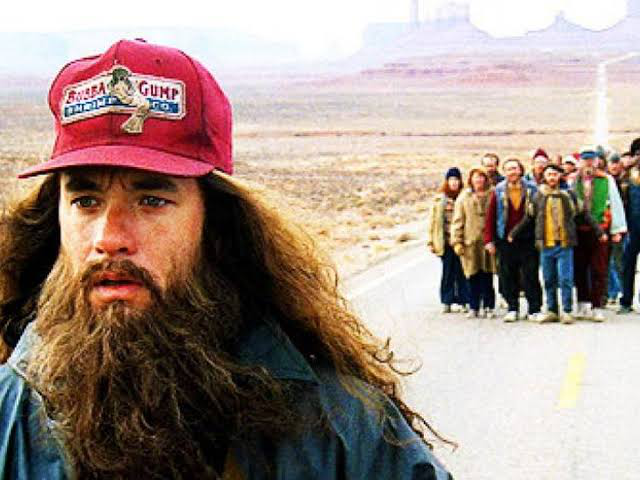

In [2]:
display(im)

In [3]:
colunas, linhas = im.size

In [4]:
len(im.histogram()[:256]),len(im.histogram()[256:512]),len(im.histogram()[512:])

(256, 256, 256)

In [5]:
sum(im.getpixel((100,100)))

333

## Entendendo o im.histogram() equivale a concatenação das listas abaixo lista_r2 + lista_g2 + lista_b2

In [6]:
lista_r = []
lista_g = []
lista_b = []

for k in range(linhas):
    for j in range(colunas):
        r,g,b = im.getpixel((j,k))
        lista_r.append(r)
        lista_g.append(g)
        lista_b.append(b)
        
im.histogram()[0] == lista_r.count(0)

True

In [7]:
counter_r = collections.Counter(sorted(lista_r))
lista_r2 = list(counter_r.values())

counter_g = collections.Counter(sorted(lista_g))
lista_g2 = list(counter_g.values())

counter_b = collections.Counter(sorted(lista_b))
lista_b2 = list(counter_b.values())

<Figure size 800x560 with 0 Axes>

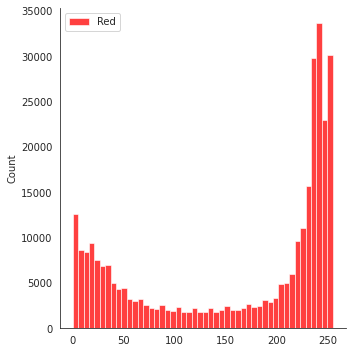

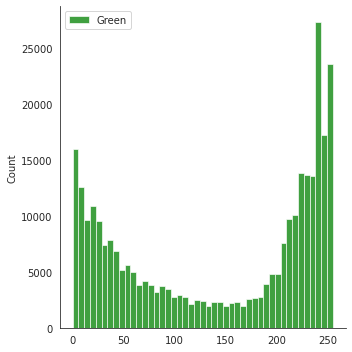

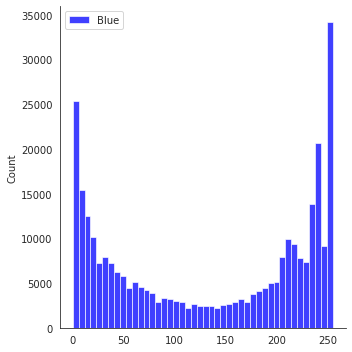

In [8]:
sns.set_style("white")

# Plot

plt.figure(figsize=(10,7), dpi= 80)
sns.displot(lista_r, color="red", label="Red")
plt.legend();
sns.displot(lista_g, color="Green", label="Green")
plt.legend();
sns.displot(lista_b, color="Blue", label="Blue")
plt.legend();

## Gerando uma negativa da imagem

In [9]:
im2 = im.copy()

for k in range(linhas):
    for j in range(colunas):
        r,g,b = im.getpixel((j,k))
        im2.putpixel((j,k), (255-r,255-g,255-b))

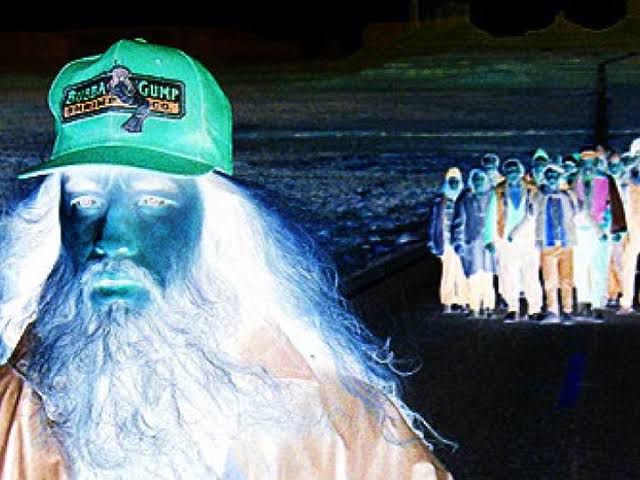

In [10]:
display(im2)

## Gerando uma imagem em Grayscale

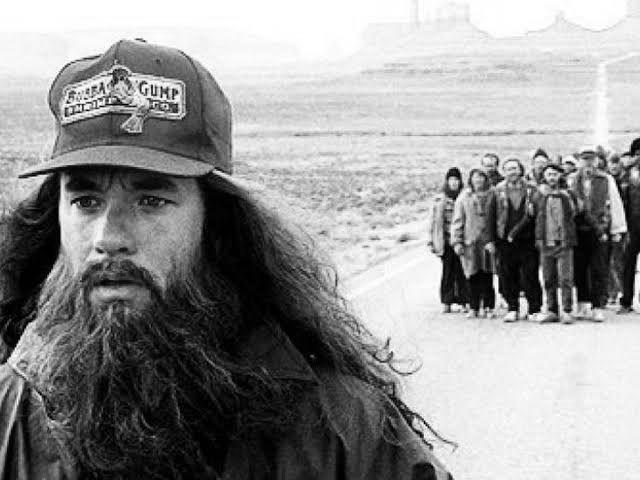

In [11]:
im3 = im.copy()

for k in range(linhas):
    for j in range(colunas):
        r,g,b = im.getpixel((j,k))
        rm = (r+g+b)//3
        im3.putpixel((j,k), (rm,rm,rm))

display(im3)

## Imagem em preto e branco

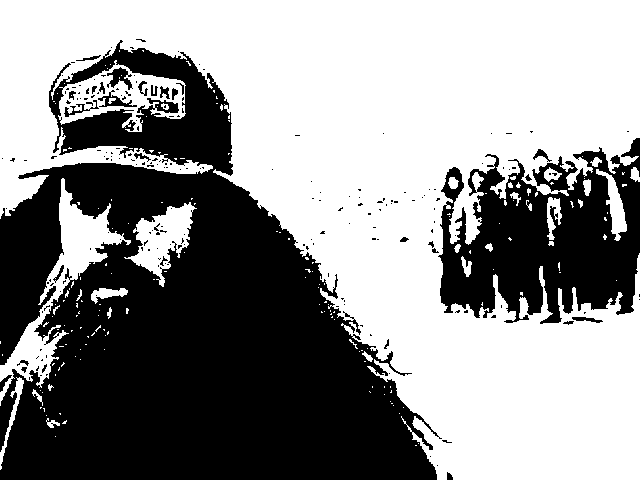

In [12]:
im4 = im.copy()

for k in range(linhas):
    for j in range(colunas):
        r,g,b = im.getpixel((j,k))
        rm = 0 if ((r+g+b)//3) < 140 else 255
        im4.putpixel((j,k), (rm,rm,rm))

display(im4)

## Retirando todo o vermelho

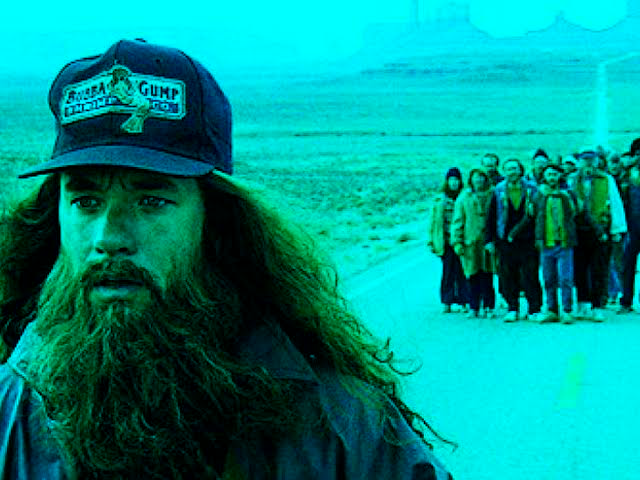

In [13]:
im5 = im.copy()

for k in range(linhas):
    for j in range(colunas):
        r,g,b = im.getpixel((j,k))
        im5.putpixel((j,k), (0,g,b))

display(im5)

## Sépia Tone

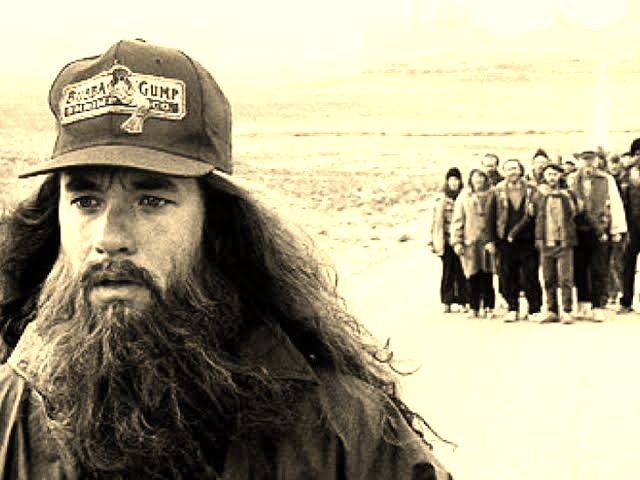

In [14]:
im6 = im.copy()

for k in range(linhas):
    for j in range(colunas):
        R,G,B = im.getpixel((j,k))
        
        newR = int((R * 0.393 + G * 0.769 + B * 0.189))
        newG = int((R * 0.349 + G * 0.686 + B * 0.168))
        newB = int((R * 0.272 + G * 0.534 + B * 0.131))

        im6.putpixel((j,k), (newR,newG,newB))

display(im6)

In [15]:
def zoom(im,taxa=2):

    colunas, linhas = im.size
    col2,lin2 = int(taxa*colunas), int(taxa*linhas)
    init_image = Image.new("RGB", (col2,lin2), (255, 255, 255))

    for k in range(col2):
        for j in range(lin2):
            j2 = j // taxa
            k2 = k // taxa
            r,g,b = im.getpixel((k2,j2))
            init_image.putpixel((k,j), (r,g,b))
    return init_image

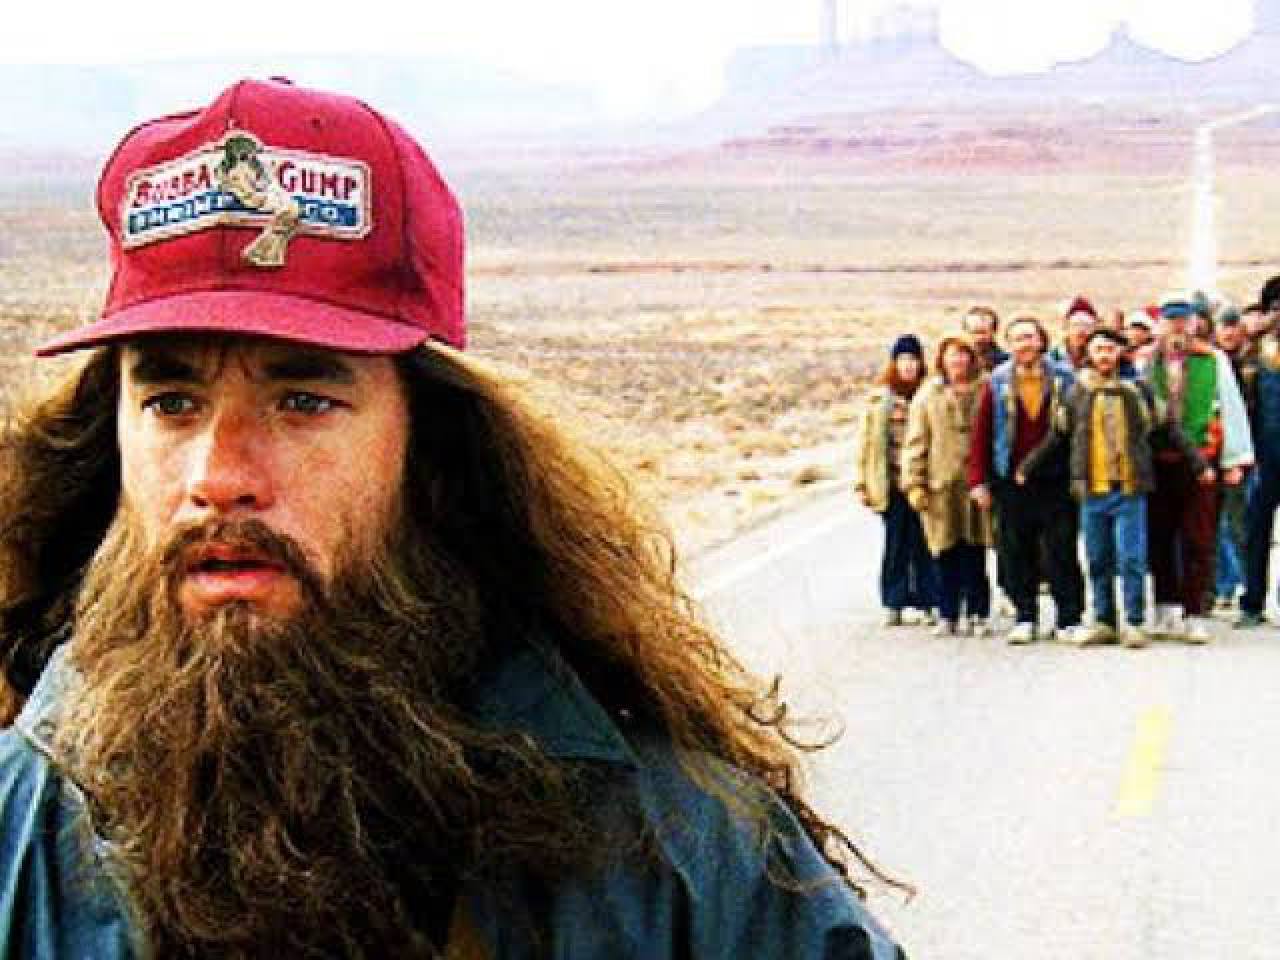

In [16]:
im_scale = zoom(im,taxa=2)

display(im_scale)

In [17]:
def smooth(im):

    colunas, linhas = im.size
    init_image = im.copy()

    for k in range(1,colunas-1):
        for j in range(1,linhas-1):
            rm,gm,bm = 0,0,0
            for w in range(-1,2,1):
                for z in range(-1,2,1):
                    r1,g1,b1 = im.getpixel((k+w,j+z))
                    rm = rm + r1
                    gm = gm + g1
                    bm = bm + b1
            init_image.putpixel((k,j), (rm//9,gm//9,bm//9))
    display(init_image)

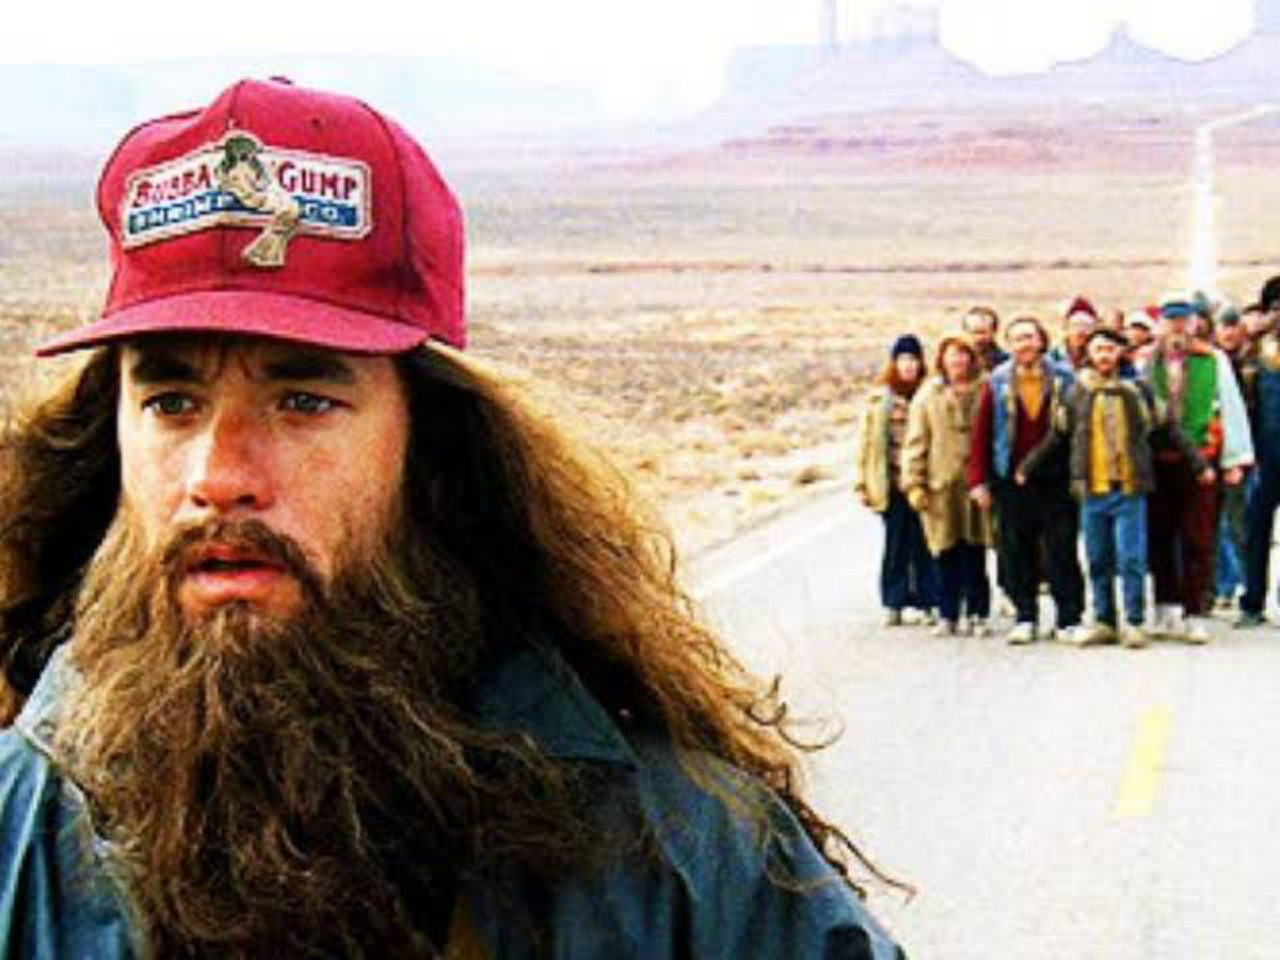

In [18]:
smooth(im_scale)

## Filtro Sobel

In [19]:
def sobel(im):

    colunas, linhas = im.size
    init_image = im.copy()

    ar1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

    ar2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

    for k in range(1,colunas-1):
        for j in range(1,linhas-1):
            A = []
            for w in range(-1,2,1):
                lista_rgb = []
                for z in range(1,-2,-1):
                    lista_rgb.append(sum(im.getpixel((k+w,j+z))))
                A.append(lista_rgb)
            Ar = np.array(A)
            Gx = sum(np.diag(np.matmul(ar1,Ar))) # Pega apenas o traço da matriz 
            Gy = sum(np.diag(np.matmul(ar2,Ar)))
            G = ((Gx*Gx) + (Gy*Gy))**0.5
            G = int(G*255/(4328)) # Maior valor obtido pela otimização matricial é 3060 x raiz2 no trazendo pro range de 255. #12*(2**0.5)

            init_image.putpixel((k,j), (G,G,G))

    return init_image

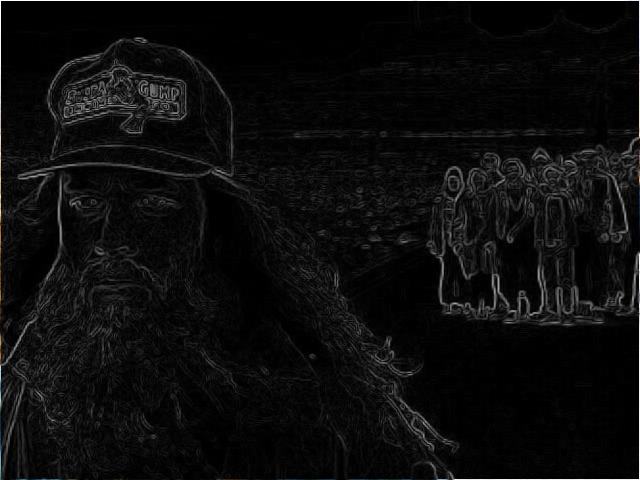

In [20]:
sobel1 = sobel(im)
sobel1

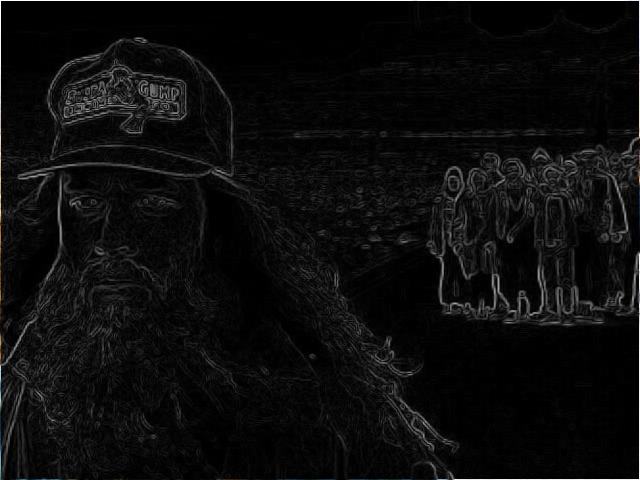

In [21]:
#@title Código da Cambridge Department of Computer Science and Technology
# Code adapted from http://www.cl.cam.ac.uk/projects/raspberrypi/tutorials/image-processing/edge_detection.html
# Licensed under the Creative Commons Attribution-ShareAlike 3.0 Unported License.

# this algorithm takes some time for larger images - this increases the amount of time
# the program is allowed to run before it times out

newimg = im.copy()
colunas, linhas = im.size

for x in range(1, colunas-1):  # ignore the edge pixels for simplicity (1 to width-1)
    for y in range(1, linhas-1): # ignore edge pixels for simplicity (1 to height-1)

        # initialise Gx to 0 and Gy to 0 for every pixel
        Gx = 0
        Gy = 0

        # intensity ranges from 0 to 765 (255 * 3)
        # top left pixel
        p = im.getpixel((x-1, y+1))
        Gx += -sum(p)
        Gy += sum(p)
  

        # remaining left column
        p = im.getpixel((x-1, y))
        Gx += -2 * sum(p)        
       

        p = im.getpixel((x-1, y-1))
        # accumulate the value into Gx, and Gy
        Gx += -sum(p)
        Gy += -sum(p)
 

        # middle pixels
        p = im.getpixel((x, y+1))
        Gy += 2 * sum(p)
 

        p = im.getpixel((x, y-1))
        Gy += -2 * sum(p)


        # right column
        p = im.getpixel((x+1, y-1))
        Gx += sum(p)
        Gy += -sum(p)

        p = im.getpixel((x+1, y))
        Gx += 2 * sum(p)

        p = im.getpixel((x+1, y+1))
        Gx += sum(p)
        Gy += sum(p)


        # calculate the length of the gradient (Pythagorean theorem)
        length = np.sqrt((Gx * Gx) + (Gy * Gy))

        # normalise the length of gradient to the range 0 to 255
        length = length / 4328 * 255

        length = int(length)

        # draw the length in the edge image
        newimg.putpixel((x,y), (length,length,length))

display(newimg)